###以Jupyter Notebook为基本工具

每个特征的取值范围为[0,255]
橙色 表示+1类样本
蓝色 表示-1类样本

变量取值的渐变色
红色 表示正值
绿色 表示负值




In [1]:
# -*- coding:UTF-8 -*- ＃
# 导入模块
import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive,FloatSlider

from sklearn import cluster,datasets
from matplotlib.colors import ListedColormap
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import SGDClassifier, Perceptron

import mymodule as MYD

# 四种数据集展示

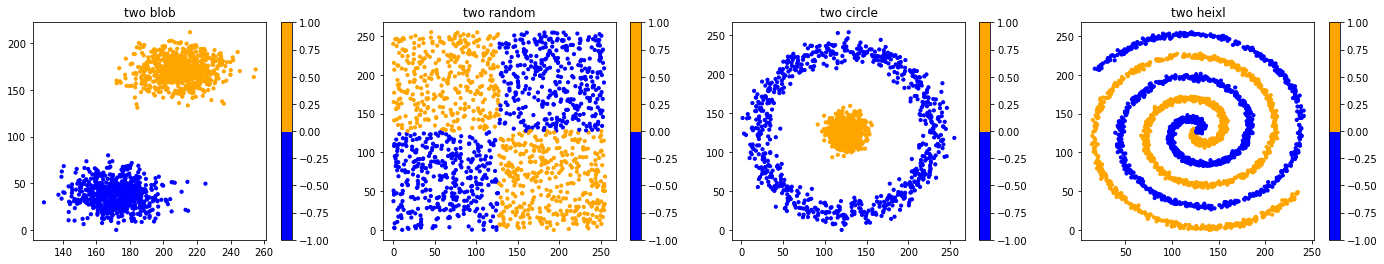

In [2]:
n_samples=1500
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)


# 测试数据集

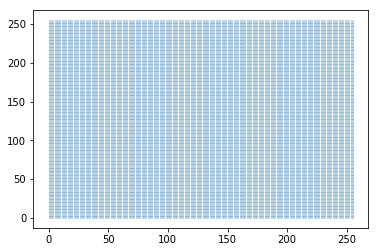

(65536,)

In [3]:
Xzip,points=MYD.makeGrids()
plt.figure()
plt.scatter(points[:,0],points[:,1],s=0.009)
plt.show()
np.random.shuffle(points)
points = np.array(points)
points[:,0].shape

# KNC、naive_bayesGB、QDA分类实现

In [4]:
L=len(points)
def f(a=0.1):
    
    number_of_samples = int(a*L)
    p = points[0:number_of_samples]
    
    cor = ListedColormap(['Blue', 'Orange'])
    lableKNC=[];  lableGB=[];  lableQDA=[];
    
    for i in range(0,len(XAS)):
        modelKNC=KNeighborsClassifier(1)
        modelGB=GaussianNB()
        modelQDA=QuadraticDiscriminantAnalysis()
        modelKNC.fit(XAS[i],YAS[i])
        modelGB.fit(XAS[i],YAS[i])
        modelQDA.fit(XAS[i],YAS[i])
        Lknc=modelKNC.predict(p); Lgb=modelGB.predict(p); Lqda=modelQDA.predict(p);
        lableKNC.append(Lknc)
        lableGB.append(Lgb)
        lableQDA.append(Lqda);

    labelclass=[lableKNC,lableGB,lableQDA]

    cormap=[cor,cor,cor,cor]
    X=[p,p,p,p]
    KNCname=['KNCB','KNCR','KNCC','KNCH']
    GBname=['GBB','GBR','GBC','GBH']
    QDAname=['QDAB','QDAR','QDAC','QDAH']
    name=[KNCname,GBname,QDAname]
    for k in range(0,3):
        MYD.DrawManyChart(X,labelclass[k],cormap,18,4,name[k],10,1,4)
 
    #return number_of_samples
    
interactive(f, a=FloatSlider(min=0.1, max=1.0, step=0.1,value=0.1))

# 训练样本的（归一化）损失值

C:\Users\zhang\Desktop\exeserise\FirstSectionPixcel\mymodule.py:21: RuntimeWarning: invalid value encountered in true_divide
  x=(x-minx)/(maxX-minx)


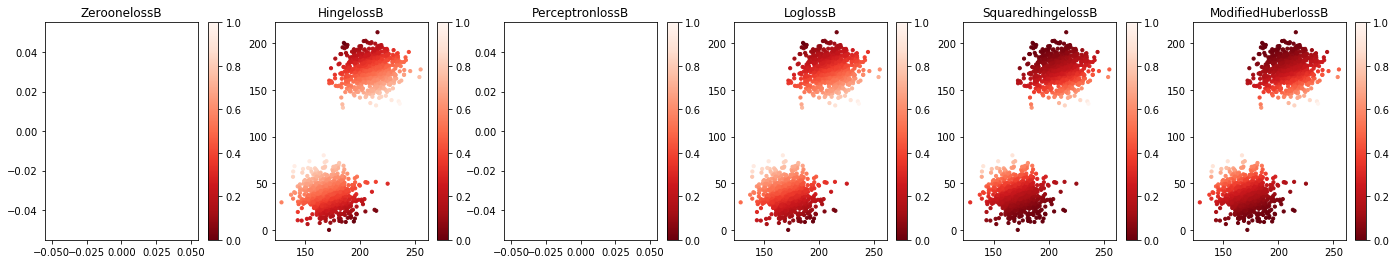

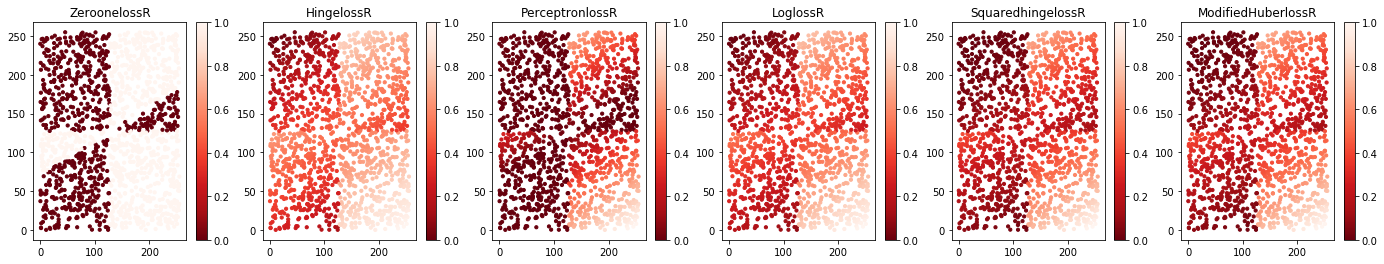

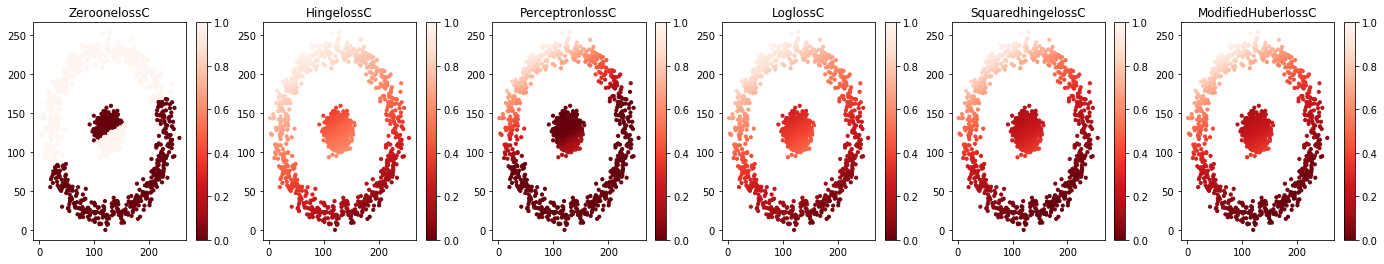

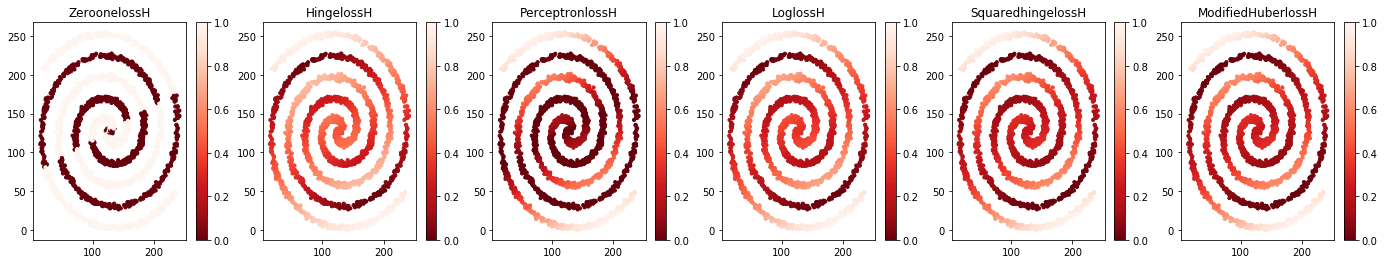

In [5]:
SGDclfB = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfB.fit(XB, yb); 

SGDclfR = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfR.fit(XR, yr); 

SGDclfC = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfC.fit(XC, yc);

SGDclfH = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfH.fit(XH, yh); 

GXB = SGDclfB.decision_function(XB); GXBNor=MYD.ZoomIn(GXB,1);
GXR = SGDclfB.decision_function(XR); GXRNor=MYD.ZoomIn(GXR,1);
GXC = SGDclfB.decision_function(XC); GXCNor=MYD.ZoomIn(GXC,1);
GXH = SGDclfB.decision_function(XH); GXHNor=MYD.ZoomIn(GXH,1);

HXB=np.array(MYD.MultiplyDW(GXBNor,yb)); HXR=np.array(MYD.MultiplyDW(GXRNor,yr));
HXC=np.array(MYD.MultiplyDW(GXCNor,yc)); HXH=np.array(MYD.MultiplyDW(GXHNor,yh));

ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB=MYD.lossfunction(HXB)
ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR=MYD.lossfunction(HXR)
ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC=MYD.lossfunction(HXC)
ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH=MYD.lossfunction(HXH)

cor=plt.cm.get_cmap('Reds_r');
XBB=[XB,XB,XB,XB,XB,XB];  XRR=[XR,XR,XR,XR,XR,XR];
XCC=[XC,XC,XC,XC,XC,XC];  XHH=[XH,XH,XH,XH,XH,XH];
YBB=[ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB]; 
YRR=[ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR];
YCC=[ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC];  
YHH=[ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH];
titlenameB=['ZeroonelossB','HingelossB','PerceptronlossB','LoglossB','SquaredhingelossB','ModifiedHuberlossB']
titlenameR=['ZeroonelossR','HingelossR','PerceptronlossR','LoglossR','SquaredhingelossR','ModifiedHuberlossR']
titlenameC=['ZeroonelossC','HingelossC','PerceptronlossC','LoglossC','SquaredhingelossC','ModifiedHuberlossC']
titlenameH=['ZeroonelossH','HingelossH','PerceptronlossH','LoglossH','SquaredhingelossH','ModifiedHuberlossH']
corbar=[cor,cor,cor,cor,cor,cor]
MYD.DrawManyChart(XBB,YBB,corbar,24,4,titlenameB,10,1,6)
MYD.DrawManyChart(XRR,YRR,corbar,24,4,titlenameR,10,1,6)
MYD.DrawManyChart(XCC,YCC,corbar,24,4,titlenameC,10,1,6)
MYD.DrawManyChart(XHH,YHH,corbar,24,4,titlenameH,10,1,6)

#  假设测试样本分别为正类的（归一化）损失值

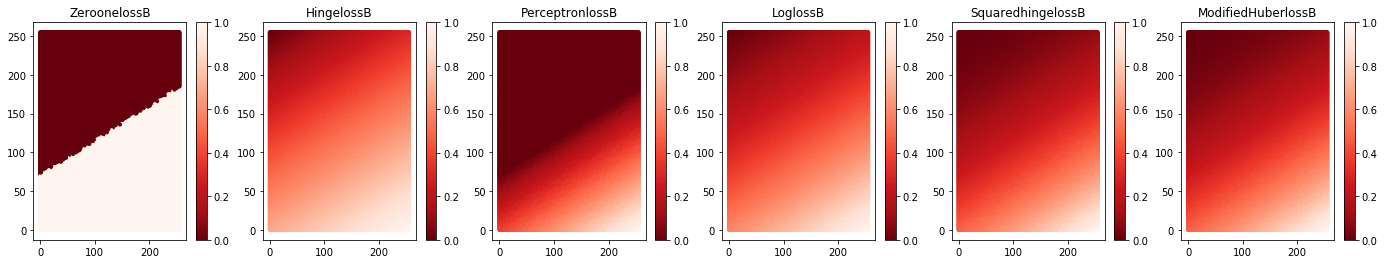

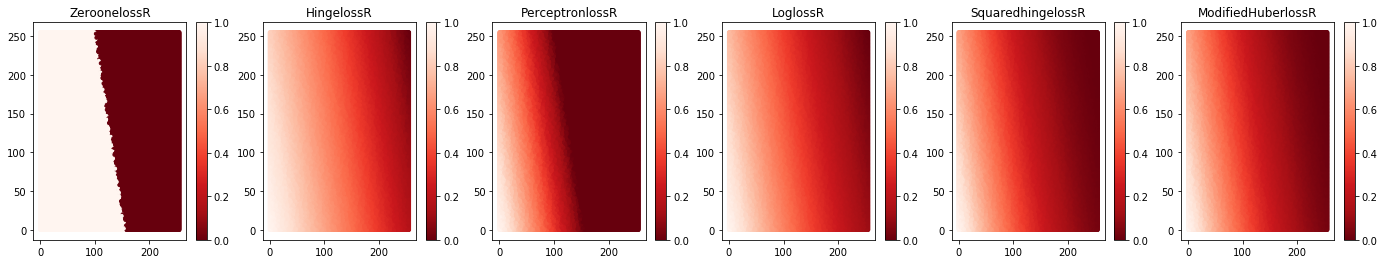

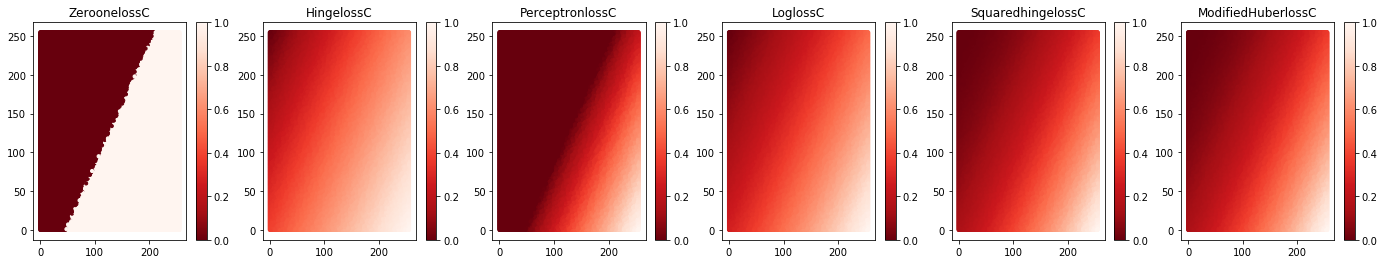

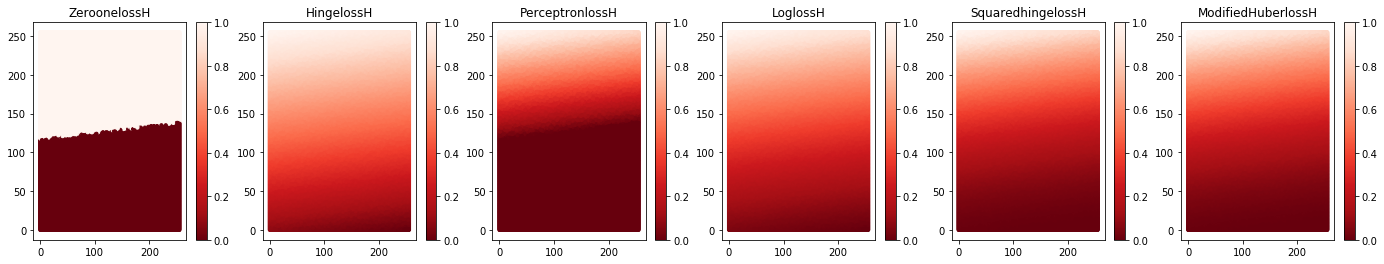

In [6]:
TestGXB= SGDclfB.decision_function(points)
TestGXNorB=MYD.ZoomIn(TestGXB,1);
TestGXNorarrayB=np.array(TestGXNorB)

TestGXR= SGDclfR.decision_function(points)
TestGXNorR=MYD.ZoomIn(TestGXR,1);
TestGXNorarrayR=np.array(TestGXNorR)

TestGXC= SGDclfC.decision_function(points)
TestGXNorC=MYD.ZoomIn(TestGXC,1);
TestGXNorarrayC=np.array(TestGXNorC)

TestGXH= SGDclfH.decision_function(points)
TestGXNorH=MYD.ZoomIn(TestGXH,1);
TestGXNorarrayH=np.array(TestGXNorH)

ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB=MYD.lossfunction(TestGXNorarrayB)
ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR=MYD.lossfunction(TestGXNorarrayR)
ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC=MYD.lossfunction(TestGXNorarrayC)
ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH=MYD.lossfunction(TestGXNorarrayH)

cor=plt.cm.get_cmap('Reds_r');
X=[points,points,points,points,points,points];  
YBB=[ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB]; 
YRR=[ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR];
YCC=[ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC]; 
YHH=[ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH];

MYD.DrawManyChart(X,YBB,corbar,24,4,titlenameB,10,1,6)
MYD.DrawManyChart(X,YRR,corbar,24,4,titlenameR,10,1,6)
MYD.DrawManyChart(X,YCC,corbar,24,4,titlenameC,10,1,6)
MYD.DrawManyChart(X,YHH,corbar,24,4,titlenameH,10,1,6)


#  SGD classfier分类效果

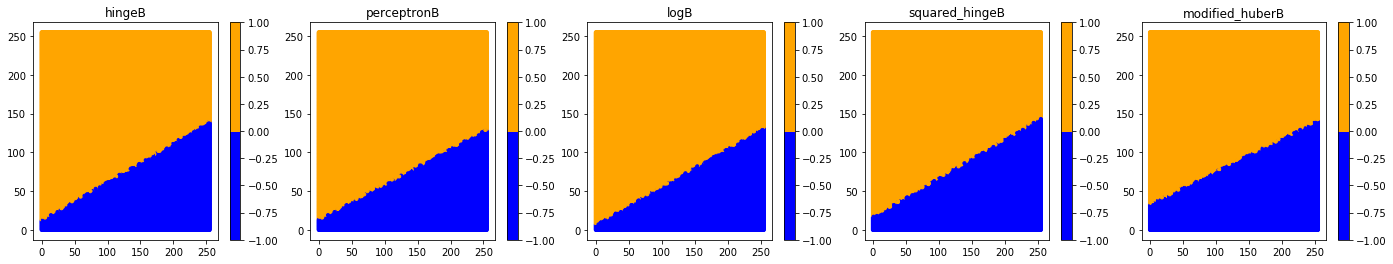

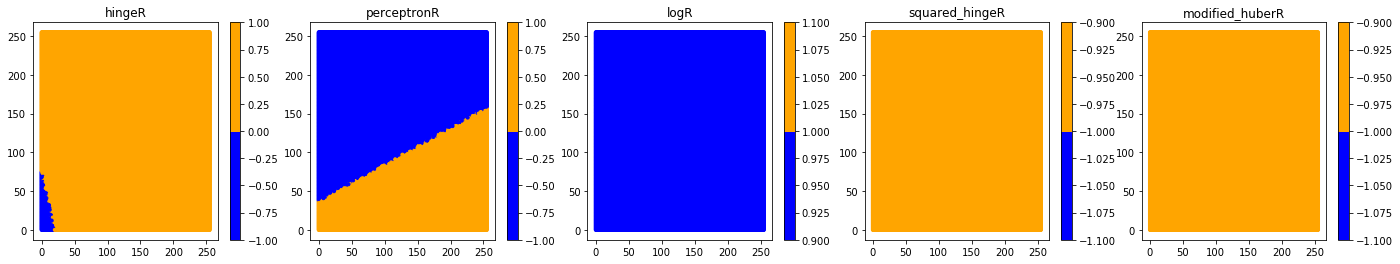

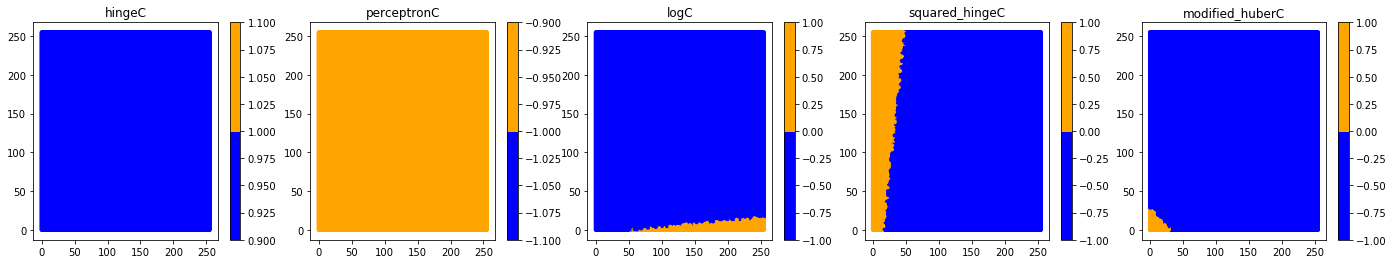

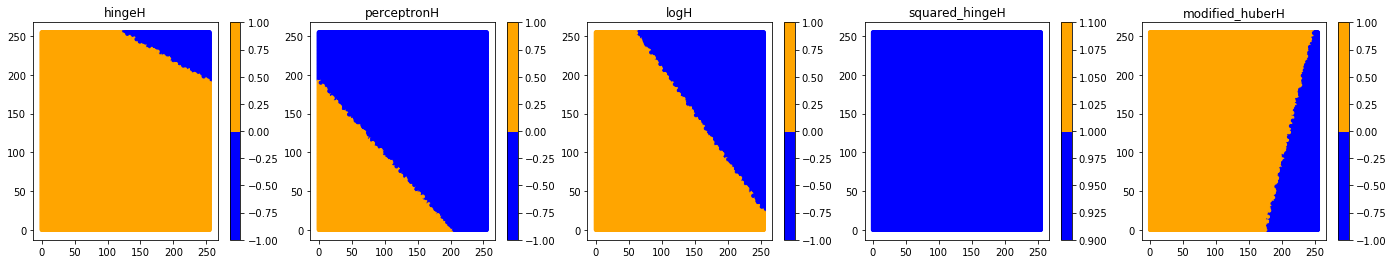

In [7]:
lossname=["hinge","perceptron","log","squared_hinge","modified_huber"]
TestclassB=[]; TestclassR=[]; TestclassC=[]; TestclassH=[];
TextClass=[TestclassB,TestclassR,TestclassC,TestclassH];

for k in range(0,len(TextClass)):
    for i in range(0,len(lossname)):
        SGDclf = SGDClassifier(loss=lossname[i], alpha=0.01, n_iter=200, fit_intercept=True)
        SGDclf.fit(XAS[k], YAS[k]); Testclass=SGDclf.predict(points); TextClass[k].append(Testclass);

corm = ListedColormap(['Blue', 'Orange'])
cormap=[corm,corm,corm,corm,corm]
X=[points,points,points,points,points]
Bname=['hingeB','perceptronB','logB','squared_hingeB','modified_huberB']
Rname=['hingeR','perceptronR','logR','squared_hingeR','modified_huberR']
Cname=['hingeC','perceptronC','logC','squared_hingeC','modified_huberC']
Hname=['hingeH','perceptronH','logH','squared_hingeH','modified_huberH']
name=[Bname,Rname,Cname,Hname]
for k in range(0,len(TextClass)):
    MYD.DrawManyChart(X,TextClass[k],cormap,24,4,name[k],10,1,5)
